In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
from tensorflow.keras.losses import MSE

In [4]:
data = pd.read_csv("/content/googleplaystore.csv")

In [5]:
df=data

In [6]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#

### Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
# replace white spaces froh header.

df.columns = df.columns.str.replace(' ','_',regex=True)
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

In [9]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [10]:
df.dropna(axis = 0, inplace = True)

In [11]:
df.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content_Rating,0
Genres,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content_Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last_Updated    9360 non-null   object 
 11  Current_Ver     9360 non-null   object 
 12  Android_Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [13]:
df['Category'].describe()

,Category
count,9360
unique,33
top,FAMILY
freq,1746


In [14]:
print( len(df['Category'].unique()) , 'categories')

print("\n", df['Category'].unique())

33 categories

 ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


In [15]:
df['Reviews'].describe()

,Reviews
count,9360
unique,5990
top,2
freq,83


In [16]:
df['Reviews']

,Reviews
0,159
1,967
2,87510
3,215644
4,967
...,...
10834,7
10836,38
10837,4
10839,114


In [17]:
# Convert to int
df['Reviews'] = df['Reviews'].apply(lambda x: int(x))
df['Reviews'].describe()

,Reviews
count,9.360000e+03
mean,5.143767e+05
std,3.145023e+06
min,1.000000e+00
25%,1.867500e+02
50%,5.955000e+03
75%,8.162750e+04
max,7.815831e+07


In [18]:
df['Size'].describe()

,Size
count,9360
unique,413
top,Varies with device
freq,1637


In [19]:
df['Size']

,Size
0,19M
1,14M
2,8.7M
3,25M
4,2.8M
...,...
10834,2.6M
10836,53M
10837,3.6M
10839,Varies with device


In [20]:
print( len(df['Size'].unique()) , "categories")

print("\n", df['Size'].unique())


413 categories

 ['19M' '14M' '8.7M' '25M' '2.8M' '5.6M' '29M' '33M' '3.1M' '28M' '12M'
 '20M' '21M' '37M' '5.5M' '17M' '39M' '31M' '4.2M' '23M' '6.0M' '6.1M'
 '4.6M' '9.2M' '5.2M' '11M' '24M' 'Varies with device' '9.4M' '15M' '10M'
 '1.2M' '26M' '8.0M' '7.9M' '56M' '57M' '35M' '54M' '201k' '3.6M' '5.7M'
 '8.6M' '2.4M' '27M' '2.7M' '2.5M' '7.0M' '16M' '3.4M' '8.9M' '3.9M'
 '2.9M' '38M' '32M' '5.4M' '18M' '1.1M' '2.2M' '4.5M' '9.8M' '52M' '9.0M'
 '6.7M' '30M' '2.6M' '7.1M' '22M' '6.4M' '3.2M' '8.2M' '4.9M' '9.5M'
 '5.0M' '5.9M' '13M' '73M' '6.8M' '3.5M' '4.0M' '2.3M' '2.1M' '42M' '9.1M'
 '55M' '23k' '7.3M' '6.5M' '1.5M' '7.5M' '51M' '41M' '48M' '8.5M' '46M'
 '8.3M' '4.3M' '4.7M' '3.3M' '40M' '7.8M' '8.8M' '6.6M' '5.1M' '61M' '66M'
 '79k' '8.4M' '3.7M' '118k' '44M' '695k' '1.6M' '6.2M' '53M' '1.4M' '3.0M'
 '7.2M' '5.8M' '3.8M' '9.6M' '45M' '63M' '49M' '77M' '4.4M' '70M' '9.3M'
 '8.1M' '36M' '6.9M' '7.4M' '84M' '97M' '2.0M' '1.9M' '1.8M' '5.3M' '47M'
 '556k' '526k' '76M' '7.6M' '59M' '9.7

In [21]:
df.Size.value_counts().head()

,count
Size,
Varies with device,1637
14M,165
12M,161
15M,159
11M,159


In [22]:
len(df[df.Size == 'Varies with device'])

1637

In [23]:
df['Size'].replace('Varies with device', np.nan, inplace = True)

In [24]:
def convert_size_to_bytes(size_str):
    if size_str == 'Varies with device':
        return np.nan
    elif isinstance(size_str, str):
        if size_str.endswith('M'):
            return float(size_str[:-1]) * 1024 * 1024
        elif size_str.endswith('k'):
            return float(size_str[:-1]) * 1024
    return np.nan

df['Size'] = df['Size'].apply(convert_size_to_bytes)

print(df['Size'].dtype)


float64


In [25]:
print(df['Size'].unique()[:5])

[19922944.  14680064.   9122611.2 26214400.   2936012.8]


In [26]:
df.Size = pd.to_numeric(df.Size)

In [27]:
df['Size'].fillna(df.groupby('Category')['Size'].transform('mean'),inplace = True)

In [28]:
df.Size.describe()

,Size
count,9.360000e+03
mean,2.358802e+07
std,2.272194e+07
min,8.704000e+03
25%,6.920602e+06
50%,1.677722e+07
75%,3.145728e+07
max,1.048576e+08


In [29]:
print( len(df['Installs'].unique()) , "categories")

print("\n", df['Installs'].unique())

19 categories

 ['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '100+' '500+' '10+' '5+' '50+' '1+']


In [30]:
df.Installs.value_counts()

,count
Installs,
"1,000,000+",1576
"10,000,000+",1252
"100,000+",1150
"10,000+",1009
"5,000,000+",752
"1,000+",712
"500,000+",537
"50,000+",466
"5,000+",431


In [31]:
df.Installs = df.Installs.apply(lambda x: x.replace(',',''))
df.Installs = df.Installs.apply(lambda x: x.replace('+',''))
df.Installs = df.Installs.apply(lambda x: int(x))

In [32]:
df.Installs.unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1])

In [33]:
df.Type.value_counts()

,count
Type,
Free,8715
Paid,645


In [34]:
df.Price.value_counts()

,count
Price,
0,8715
$2.99,114
$0.99,106
$4.99,70
$1.99,59
...,...
$1.29,1
$299.99,1
$379.99,1


In [35]:
print( len(df['Price'].unique()) , "categories")

print("\n", df['Price'].unique())


73 categories

 ['0' '$4.99' '$3.99' '$6.99' '$7.99' '$5.99' '$2.99' '$3.49' '$1.99'
 '$9.99' '$7.49' '$0.99' '$9.00' '$5.49' '$10.00' '$24.99' '$11.99'
 '$79.99' '$16.99' '$14.99' '$29.99' '$12.99' '$2.49' '$10.99' '$1.50'
 '$19.99' '$15.99' '$33.99' '$39.99' '$3.95' '$4.49' '$1.70' '$8.99'
 '$1.49' '$3.88' '$399.99' '$17.99' '$400.00' '$3.02' '$1.76' '$4.84'
 '$4.77' '$1.61' '$2.50' '$1.59' '$6.49' '$1.29' '$299.99' '$379.99'
 '$37.99' '$18.99' '$389.99' '$8.49' '$1.75' '$14.00' '$2.00' '$3.08'
 '$2.59' '$19.40' '$3.90' '$4.59' '$15.46' '$3.04' '$13.99' '$4.29'
 '$3.28' '$4.60' '$1.00' '$2.95' '$2.90' '$1.97' '$2.56' '$1.20']


In [36]:
df.Price = df.Price.apply(lambda x: x.replace('$',''))
df['Price'] = df['Price'].apply(lambda x: float(x))

In [37]:
df.Price.describe()

,Price
count,9360.000000
mean,0.961279
std,15.821640
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,400.000000


In [38]:
df.Price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

In [39]:
df['Content_Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [40]:
df['Content_Rating'].value_counts()


,count
Content_Rating,
Everyone,7414
Teen,1084
Mature 17+,461
Everyone 10+,397
Adults only 18+,3
Unrated,1


In [41]:
print( len(df['Genres'].unique()) , "categories")

print("\n", df['Genres'].unique())

115 categories

 ['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Auto & Vehicles' 'Beauty' 'Books & Reference' 'Business' 'Comics'
 'Comics;Creativity' 'Communication' 'Dating' 'Education;Education'
 'Education' 'Education;Creativity' 'Education;Music & Video'
 'Education;Action & Adventure' 'Education;Pretend Play'
 'Education;Brain Games' 'Entertainment' 'Entertainment;Music & Video'
 'Entertainment;Brain Games' 'Entertainment;Creativity' 'Events' 'Finance'
 'Food & Drink' 'Health & Fitness' 'House & Home' 'Libraries & Demo'
 'Lifestyle' 'Lifestyle;Pretend Play' 'Adventure;Action & Adventure'
 'Arcade' 'Casual' 'Card' 'Casual;Pretend Play' 'Action' 'Strategy'
 'Puzzle' 'Sports' 'Music' 'Word' 'Racing' 'Casual;Creativity'
 'Casual;Action & Adventure' 'Simulation' 'Adventure' 'Board' 'Trivia'
 'Role Playing' 'Simulation;Education' 'Action;Action & Adventure'
 'Casual;Brain Games' 'Simulation;Action & Adventure'
 'Educational;Creativity' 'Puzzle;Brain Games' 'Edu

In [42]:
df.Genres.value_counts()

,count
Genres,
Tools,732
Entertainment,533
Education,468
Action,358
Productivity,351
...,...
Parenting;Brain Games,1
Card;Brain Games,1
Tools;Education,1


In [43]:
df['Genres'] = df['Genres'].str.split(';').str[0]
df['Genres'].replace('Music & Audio', 'Music',inplace = True)

In [44]:
print( len(df['Genres'].unique()) , "categories")

print("\n", df['Genres'].unique())

47 categories

 ['Art & Design' 'Auto & Vehicles' 'Beauty' 'Books & Reference' 'Business'
 'Comics' 'Communication' 'Dating' 'Education' 'Entertainment' 'Events'
 'Finance' 'Food & Drink' 'Health & Fitness' 'House & Home'
 'Libraries & Demo' 'Lifestyle' 'Adventure' 'Arcade' 'Casual' 'Card'
 'Action' 'Strategy' 'Puzzle' 'Sports' 'Music' 'Word' 'Racing'
 'Simulation' 'Board' 'Trivia' 'Role Playing' 'Educational'
 'Video Players & Editors' 'Medical' 'Social' 'Shopping' 'Photography'
 'Travel & Local' 'Tools' 'Personalization' 'Productivity' 'Parenting'
 'Weather' 'News & Magazines' 'Maps & Navigation' 'Casino']


In [45]:
df['Last_Updated']

,Last_Updated
0,"January 7, 2018"
1,"January 15, 2018"
2,"August 1, 2018"
3,"June 8, 2018"
4,"June 20, 2018"
...,...
10834,"June 18, 2017"
10836,"July 25, 2017"
10837,"July 6, 2018"
10839,"January 19, 2015"


In [46]:
df['new'] = pd.to_datetime(df['Last_Updated'])
df['new'].describe()

,new
count,9360
mean,2017-11-29 13:00:55.384615424
min,2010-05-21 00:00:00
25%,2017-10-09 00:00:00
50%,2018-06-01 00:00:00
75%,2018-07-24 00:00:00
max,2018-08-08 00:00:00


In [47]:
df['lastupdate'] = (df['new'] -  df['new'].max()).dt.days
df['lastupdate'].head()

,lastupdate
0,-213
1,-205
2,-7
3,-61
4,-49


In [48]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,new,lastupdate
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2018-01-07,-213
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0.0,Everyone,Art & Design,"January 15, 2018",2.0.0,4.0.3 and up,2018-01-15,-205
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,2018-08-01,-7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,2018-06-08,-61
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0.0,Everyone,Art & Design,"June 20, 2018",1.1,4.4 and up,2018-06-20,-49


#

#

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9360 non-null   object        
 1   Category        9360 non-null   object        
 2   Rating          9360 non-null   float64       
 3   Reviews         9360 non-null   int64         
 4   Size            9360 non-null   float64       
 5   Installs        9360 non-null   int64         
 6   Type            9360 non-null   object        
 7   Price           9360 non-null   float64       
 8   Content_Rating  9360 non-null   object        
 9   Genres          9360 non-null   object        
 10  Last_Updated    9360 non-null   object        
 11  Current_Ver     9360 non-null   object        
 12  Android_Ver     9360 non-null   object        
 13  new             9360 non-null   datetime64[ns]
 14  lastupdate      9360 non-null   int64         
dtypes: datet

In [50]:
df.describe()

,Rating,Reviews,Size,Installs,Price,new,lastupdate
count,9360.000000,9.360000e+03,9.360000e+03,9.360000e+03,9360.000000,9360,9360.000000
mean,4.191838,5.143767e+05,2.358802e+07,1.790875e+07,0.961279,2017-11-29 13:00:55.384615424,-251.457692
min,1.000000,1.000000e+00,8.704000e+03,1.000000e+00,0.000000,2010-05-21 00:00:00,-3001.000000
25%,4.000000,1.867500e+02,6.920602e+06,1.000000e+04,0.000000,2017-10-09 00:00:00,-303.000000
50%,4.300000,5.955000e+03,1.677722e+07,5.000000e+05,0.000000,2018-06-01 00:00:00,-68.000000
75%,4.500000,8.162750e+04,3.145728e+07,5.000000e+06,0.000000,2018-07-24 00:00:00,-15.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,2018-08-08 00:00:00,0.000000
std,0.515263,3.145023e+06,2.272194e+07,9.126637e+07,15.821640,NaN,396.167305


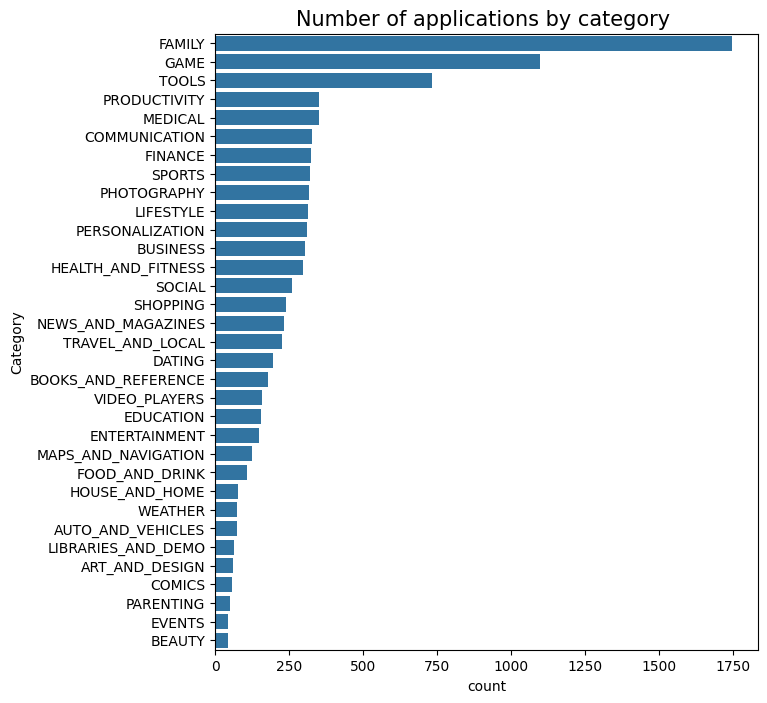

In [51]:
plt.figure(figsize=(7,8))
sns.countplot(y='Category',
              data=df,
              order = df['Category'].value_counts().index).set_title(
    label = "Number of applications by category ",
    fontsize = 15);

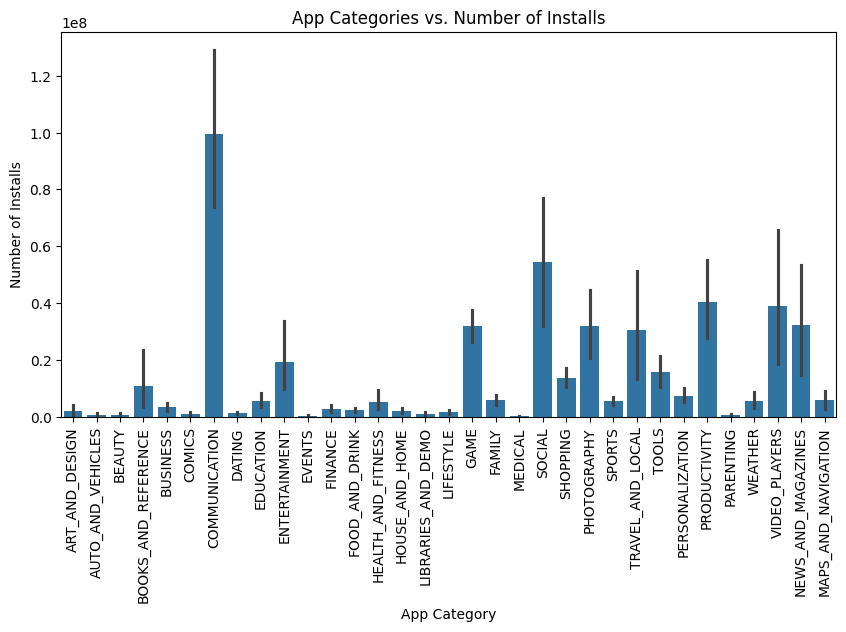

In [52]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Category', y='Installs', data=df)
plt.xticks(rotation=90)
plt.title('App Categories vs. Number of Installs')
plt.xlabel('App Category')
plt.ylabel('Number of Installs')
plt.show()

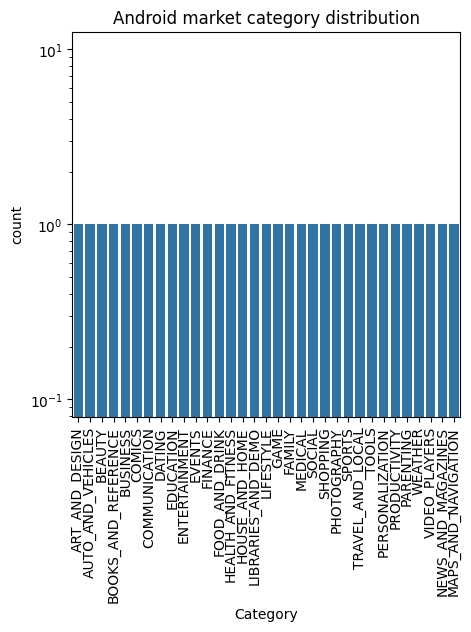

In [53]:
plt.figure(figsize=(5, 5))
sns.countplot(x=df.Category , log=True)
plt.xticks(rotation='vertical')
plt.title("Android market category distribution")
plt.show()

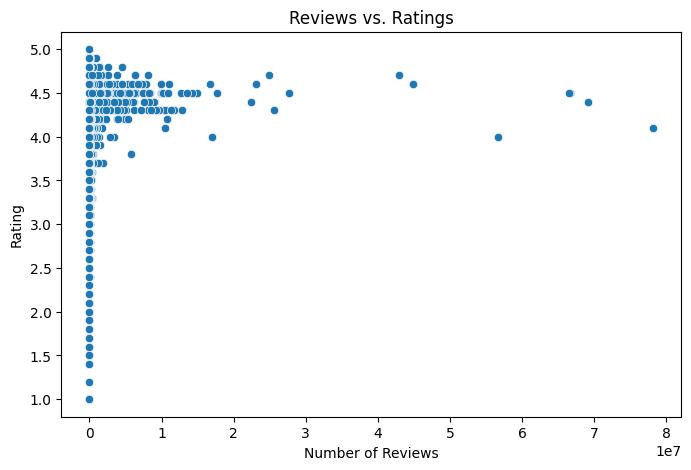

In [54]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Reviews', y='Rating', data=df)
plt.title('Reviews vs. Ratings')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.show()

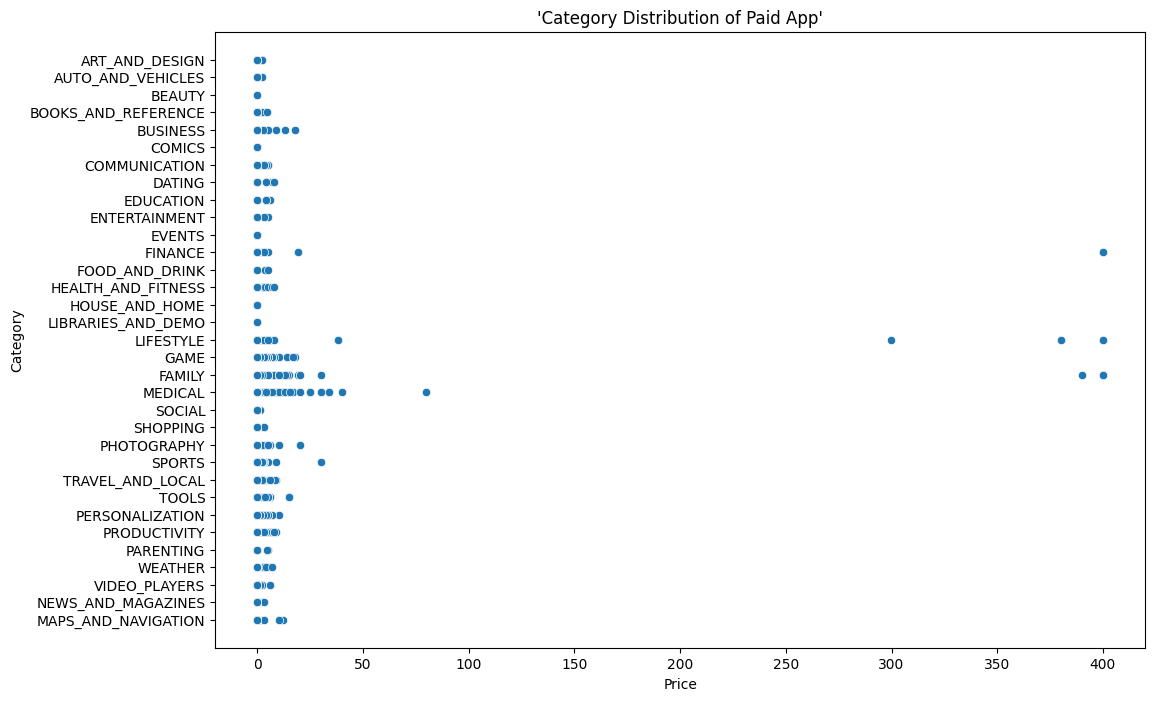

In [55]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Price',
                y='Category',
                data=df).set_title("'Category Distribution of Paid App'");

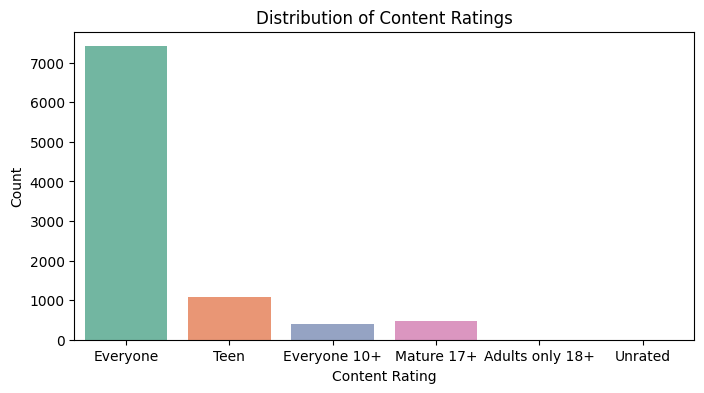

In [56]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Content_Rating', data=df, palette='Set2')
plt.title('Distribution of Content Ratings')
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.show()

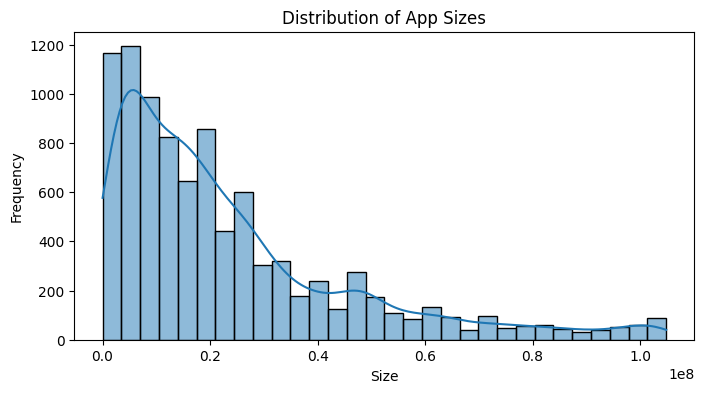

In [57]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Size'], bins=30, kde=True)
plt.title('Distribution of App Sizes')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.show()


Text(0.5, 1.0, 'Rating Density')

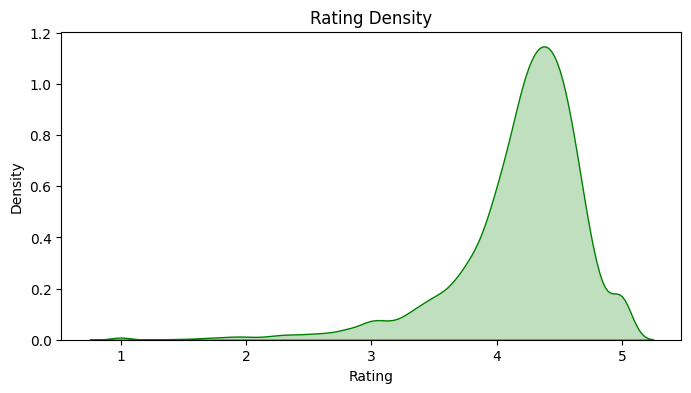

In [58]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df['Rating'], color="green", shade = True);
plt.title('Rating Density')

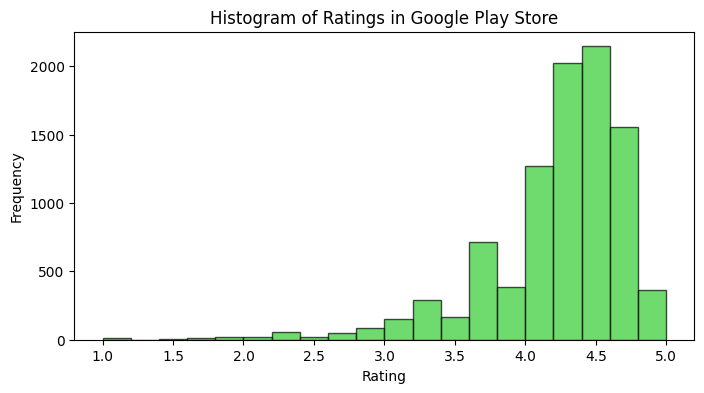

In [59]:
plt.figure(figsize=(8, 4))
plt.hist(df['Rating'], bins=20, edgecolor='k', alpha=0.7, color='limegreen')
plt.title('Histogram of Ratings in Google Play Store')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

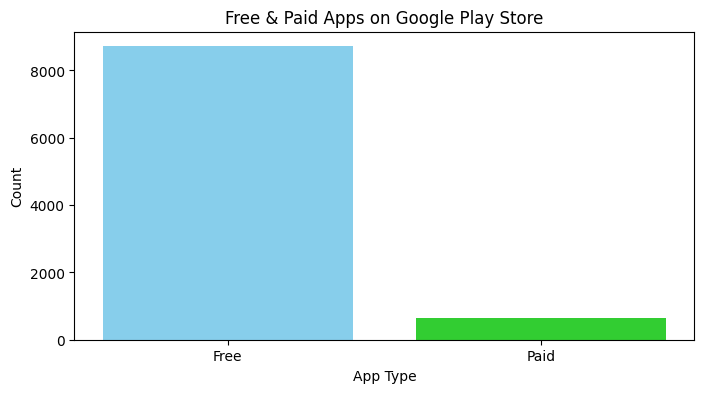

In [60]:
type_counts = df["Type"].value_counts()
plt.figure(figsize=(8, 4))
plt.bar(type_counts.index, type_counts.values, color=['skyblue', 'limegreen'])
plt.title("Free & Paid Apps on Google Play Store")
plt.xlabel("App Type")
plt.ylabel("Count")
plt.xticks(type_counts.index, ["Free", "Paid"])
plt.show()

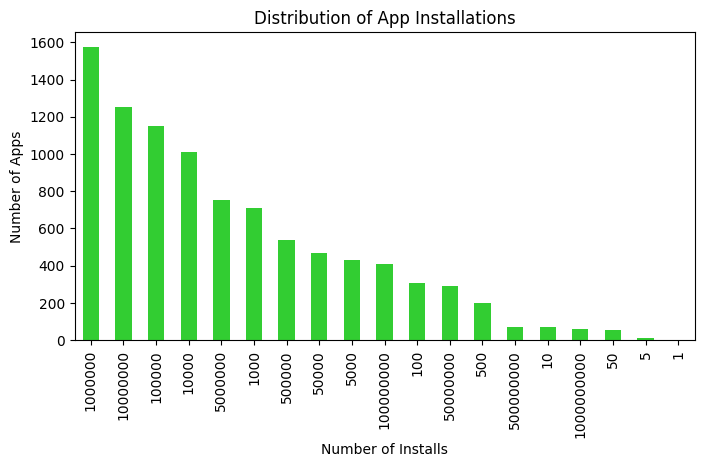

In [61]:
install_counts = df['Installs'].value_counts()
plt.figure(figsize=(8, 4))
install_counts.plot(kind='bar', color="limegreen")
plt.xlabel('Number of Installs')
plt.ylabel('Number of Apps')
plt.title('Distribution of App Installations')
plt.show()

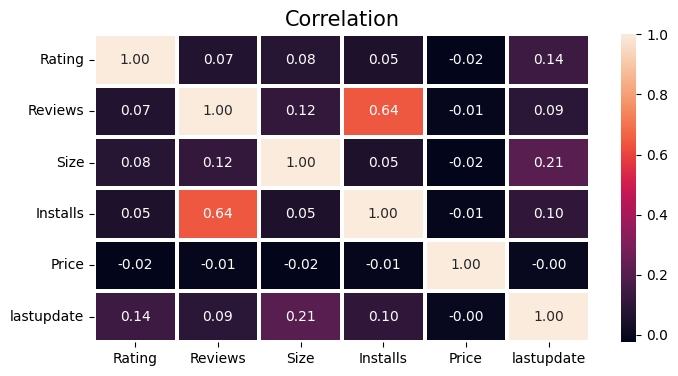

In [62]:
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(8, 4))
sns.heatmap(numeric_df.corr(), annot=True, linewidths=1.5, fmt='.2f')
plt.title("Correlation", size=15)
plt.show()

#

In [63]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver', 'new', 'lastupdate'],
      dtype='object')

In [64]:
df = df.drop(columns=['App', 'Last_Updated', 'Current_Ver', 'Android_Ver', 'new', 'lastupdate'])
df = pd.get_dummies(df)
X = df.drop(columns=['Rating'])
y = df['Rating']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [66]:
model = LinearRegression()
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [67]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
from sklearn.metrics import r2_score

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

Mean Squared Error: 0.24991163114815082
R-squared: 0.030489423391592108


#

In [68]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [69]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assuming X_train is your training data
# Fit the StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

# Save the mean and scale parameters
np.save("scaler_mean.npy", scaler.mean_)
np.save("scaler_scale.npy", scaler.scale_)


In [70]:
# Artifical Neural network

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='sigmoid'),
    Dense(16, activation='tanh'),
    Dense(units=1)
])


# Compile the model using Keras' MSE loss function
model.compile(optimizer='adam', loss=tf.keras.losses.MSE)

In [71]:
history = model.fit(X_train_scaled, y_train, epochs=5, validation_data=(X_test_scaled, y_test), verbose=2)


Epoch 1/5
205/205 - 3s - 14ms/step - loss: 1.3817 - val_loss: 0.2548
Epoch 2/5
205/205 - 0s - 2ms/step - loss: 0.2616 - val_loss: 0.2514
Epoch 3/5
205/205 - 1s - 3ms/step - loss: 0.2592 - val_loss: 0.2507
Epoch 4/5
205/205 - 0s - 2ms/step - loss: 0.2577 - val_loss: 0.2519
Epoch 5/5
205/205 - 1s - 2ms/step - loss: 0.2567 - val_loss: 0.2522


In [72]:
model.metrics_names

['loss']

<Axes: >

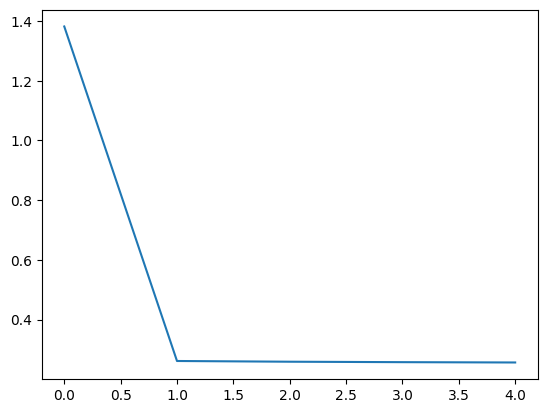

In [73]:
loss = model.history.history['loss']
sns.lineplot(x=range(len(loss)),y=loss)

In [74]:
# Evaluate the model
mse = model.evaluate(X_test_scaled, y_test)
print("Mean Squared Error on test set:", mse)


88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2694
Mean Squared Error on test set: 0.252237468957901


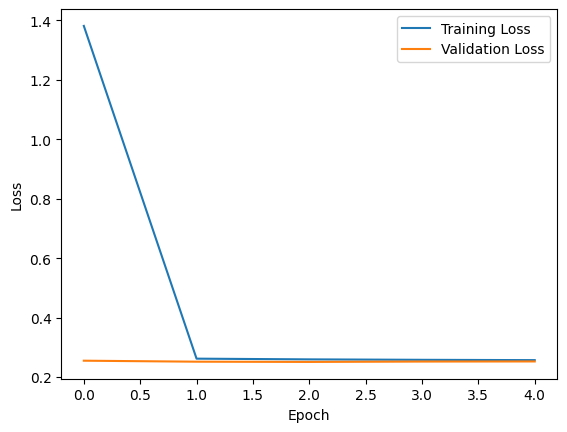

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
      Actual  Predicted
5560     4.1        4.2
2895     4.1        4.2
7836     4.3        4.3
9116     4.1        4.3
598      4.0        3.9
6465     4.5        4.2
721      3.9        4.4
5902     4.7        4.1
5698     4.1        4.4
7938     4.0        4.3


In [75]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# predictions
predictions = model.predict(X_test_scaled)

comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})
comparison['Predicted'] = comparison['Predicted'].round(1)
print(comparison.head(10))


In [76]:
# Predictions
from sklearn.metrics import mean_squared_error
predictions = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print("Mean Absolute Error:", round(mae, 4))
print("R-squared (R2) Score:", round(r2, 4))

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Mean Absolute Error: 0.3418
R-squared (R2) Score: 0.0215


In [77]:
accuracy = 1 - (rmse / np.mean(y_test))
accuracy_formatted = "{:.2f}%".format(accuracy)
print("Accuracy:", accuracy_formatted)

Accuracy: 0.88%


In [78]:
# model.save("google_playstore_rating_prediction_model.h5")